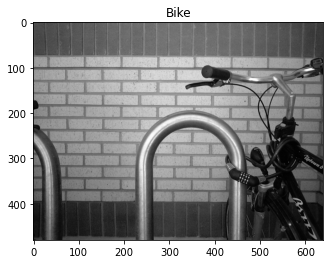

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('pics/bike.jpg')
plt.imshow(img), plt.title('Bike')
plt.show()

### Convolución:
Vamos a definir la operación de convlución como la multiplación elemento a elemento entre dos matrices seguida por la suma de sus elementos: la primera de estas matrices será la ROI, una submatriz tomada de la matriz de dimensiones mayores (la imagen a la que se le quiere aplicar el filtro), la segunda será como tal la máscara.

In [22]:
def conv(img, kernel):
    #Obtenemos las dimensiones de la imagen y del kernel:
    (imgH, imgW) = img.shape[:2]
    (kerH, kerW) = kernel.shape[:2]
    
    
    #La convolución siempre reduce las dimensiones de la imagen,
    #por ende incrementamos las dimensiones de la imagen en todas
    #las direcciones en una magnitud igual a aproximadamente la mitad
    #del ancho/alto de la máscara (esto debido a que es impar y es simétrica)
    border = (kerH -1 ) //2 
    img = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)
    
    #Definimos uan nueva matriz que contendrá la imagen de destino con las 
    #dimensiones originales de la imagen
    output = np.zeros((imgH, imgW), dtype="float32")
    
    #Se itera sobre cada uno de los píxeles de la imagen original
    for y in np.arange(border, imgH + border):
        for x in np.arange(border, imgW + border):
            #se defina una roi centrada en en pixel x,y del tamaño de la máscara
            roi = img[y - border : y + border + 1, x - border : x + border +1]
            #se hace la convolución
            k_i=(roi * kernel).sum()
            
            #se almacena en la imagen destino:
            output.itemset((y-1,x-1),k_i)
            

    #se reescala a 8 bits:
    output = cv2.normalize(output,None,0,1,cv2.NORM_MINMAX)
    
    return output


## Notas
La convolución siempre reduce las dimensiones de la imagen, por ende incrementamos las dimensiones de la imagen en todas
las direcciones en una magnitud igual a aproximadamente la mitad del ancho/alto de la máscara (esto debido a que es impar y es simétrica)

In [83]:
k_t = np.array(
    ([1, 1, 1],
     [1, 1, 1],
     [1, 1, 1]),dtype="int")
test = conv(img,k_t)

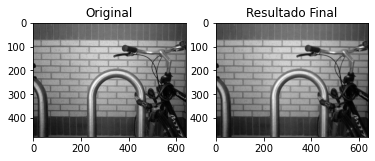

In [84]:

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(122), plt.imshow(test, cmap='gray'), plt.title("Resultado Final")
plt.show()

### Filtro de Prewitt
Una vez tenemos lista la función correspondiente al filtro convolucional, se construyen las matrices del Filtro de Prewitt:

In [3]:
#Se definen las 8 matrices que definen  las 8 direcciones del filtro de Prewitt 
NO=np.array(
    ([-1, -1, 1],
     [-1, -2, 1],
     [1, 1, 1]),dtype="int")
N=np.array(
    ([-1, -1, -1],
     [1, -2, 1],
     [1, 1, 1]),dtype="int")
NE=np.array(
    ([1, -1, -1],
     [1, -2, -1],
     [1, 1, 1]),dtype="int")
E=np.array(
    ([1, 1, -1],
     [1, -2, -1],
     [1, 1, -1]),dtype="int")
SE=np.array(
    ([1, 1, 1],
     [1, -2, -1],
     [1, -1, -1]),dtype="int")
S=np.array(
    ([1, 1, 1],
     [1, -2, 1],
     [-1, -1, -1]),dtype="int")
SO=np.array(
    ([1, 1, 1],
     [-1, -2, 1],
     [-1, -1, 1]),dtype="int")
O=np.array(
    ([-1, 1, 1],
     [-1, -2, 1],
     [-1, 1, 1]),dtype="int")

prewitt_masks=[NO, N, NE, E, SE, S, SO, O]

In [27]:
def prewitt(img):
    output = np.zeros(img.shape[:2])
    for i in range(len(prewitt_masks)):
        result = cv2.filter2D(img,-1,prewitt_masks[i]);
        #result = conv(img,prewitt_masks[i])
        result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY )
        output= output + result_gray
    return output

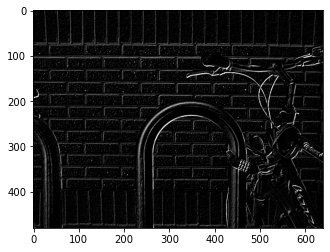

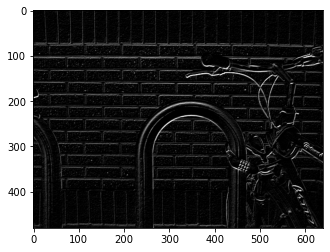

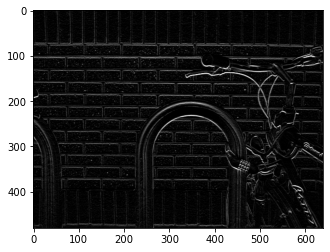

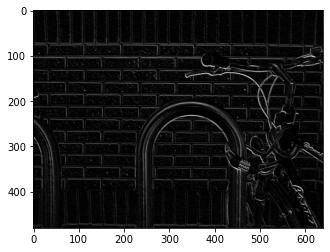

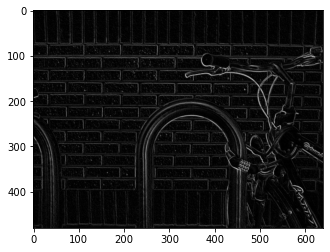

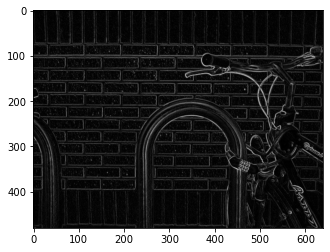

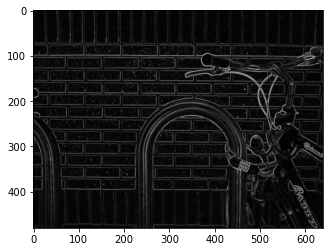

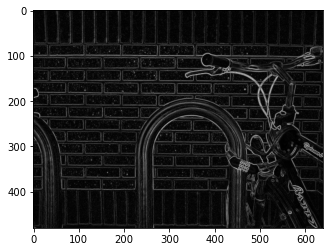

In [28]:
prewitt_test = prewitt(img)

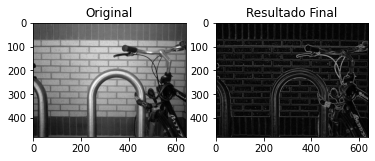

In [29]:
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(122), plt.imshow(prewitt_test, cmap='gray'), plt.title("Resultado Final")
plt.show()

# Parte 2: Filtros Espaciales
## Introducción: 
Anteriormente se demostró cómo se podía usar la operación de convolución para realizar funciones de filtrado en imágenes. A continuación se mostrarán otros filtros de común uso en Computer Vision acompañados de ejemplos prácticos enfocados al planteamiento de la solución del Proyecto.
